# NBA positions are out of date. Can we update them?

Let's use clustering to find some natural grouping of players. The features are gathered from stats.nba.com. The features will look different than typical basketball statistics. Typically the statistics ESPN puts on the screen are measuring how well the player executes. Consider field goal percentage (FG%) which measures what percentage of shots are made. This statistic measures how well a player can make baskets. But what if we're more interested in *how often* the player shoots. This is not measuring their ability to execute but their role on the team. The features used in this analysis follow the same trend.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/projects/cs6140/nba_clustering/data/clustering_df_(w FGA).csv')
df = df.fillna(value=0)
df = df.set_index('PLAYER')
minutes_played = df['MIN']
X = df.drop(columns='MIN')

In [3]:
X

,HEIGHT,WEIGHT,FGA,FGA (LESS THAN 8FT),FGA (8-16 FT),FGA (16-24 FT),FGA (24+ FT),OFF BOX OUTS,DEF BOX OUTS,ISO %,...,DIST MILES DEF,DFGA,TOUCHES,FRONT CT TOUCHES,TIME OF POSS,AVG SEC/TOUCH,AVG DRIB/TOUCH,ELBOW TOUCHES,POST UPS,PAINT TOUCHES
PLAYER,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,0.55,0.496689,0.379310,0.422865,0.180441,0.085399,0.303030,0.098048,0.053292,0.055,...,0.666667,0.303566,0.533446,0.504586,0.300236,0.452830,0.280650,0.220778,0.294329,0.293452
Aaron Holiday,0.15,0.165563,0.362573,0.358871,0.125000,0.106855,0.407258,0.019597,0.070175,0.070,...,0.709064,0.432599,0.568122,0.415738,0.496701,0.702830,0.638109,0.017321,0.000000,0.033812
Abdel Nader,0.40,0.430464,0.291005,0.431818,0.054545,0.036364,0.477273,0.000000,0.097884,0.000,...,0.740741,0.360535,0.323396,0.382431,0.128399,0.322327,0.209749,0.067910,0.004117,0.055357
Adam Mokoka,0.40,0.198675,0.250000,0.428571,0.000000,0.035714,0.535714,0.359049,0.107143,0.000,...,0.750000,0.388049,0.331284,0.389459,0.104003,0.231132,0.122600,0.070522,0.000000,0.176996
Admiral Schofield,0.40,0.536424,0.255973,0.293333,0.066667,0.013333,0.613333,0.045749,0.211604,0.000,...,0.675768,0.372364,0.477139,0.404625,0.132518,0.218553,0.069424,0.067393,0.063735,0.135314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach LaVine,0.45,0.264901,0.575060,0.443703,0.059216,0.092577,0.402836,0.025716,0.046043,0.114,...,0.711751,0.264773,0.643818,0.599991,0.506531,0.633648,0.488922,0.081447,0.029855,0.089795
Zach Norvell Jr.,0.40,0.298013,0.292683,0.000000,0.166667,0.166667,0.666667,0.000000,0.000000,0.000,...,0.682927,0.250156,0.420164,0.436467,0.189404,0.311321,0.202363,0.000000,0.075912,0.107445
Zhaire Smith,0.30,0.298013,0.343750,0.545455,0.090909,0.090909,0.272727,0.000000,0.062500,0.000,...,0.812500,0.268429,0.258815,0.349514,0.121337,0.261006,0.112260,0.000000,0.000000,0.137663


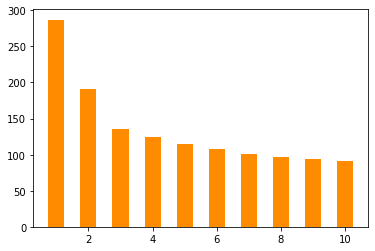

In [4]:
%matplotlib inline
possible_k = list(range(1,11))
inertia = []
for k in possible_k:
    temp_kmeans = KMeans(n_clusters=k).fit(X)
    inertia.append(temp_kmeans.inertia_)
plt.bar(possible_k, inertia, color='darkorange', width=0.5)
plt.show()

In [5]:
k = 3
kmeans = KMeans(n_clusters=k).fit(X)
labels = kmeans.labels_
minutes_played = minutes_played.to_frame()
minutes_played.insert(1, 'LABELS', labels)

In [16]:
def get_top_players(df, label):
    df_label = df[df['LABELS'] == label]
    top_10_bool = df_label.loc[:, 'MIN'].rank(ascending=False, method='first') <= 10.0
    top_10 = df_label[top_10_bool].sort_values(by='MIN', ascending=False)
    return list(top_10.index)

In [17]:
top_10_lists = []
for label in range(k):
    top_10_lists.append(get_top_players(minutes_played, label))
pd.DataFrame(top_10_lists).transpose()

,0,1,2
0,Devin Booker,Tobias Harris,Bam Adebayo
1,James Harden,Harrison Barnes,Domantas Sabonis
2,CJ McCollum,P.J. Tucker,Rudy Gobert
3,Shai Gilgeous-Alexander,Bojan Bogdanovic,Nikola Jokic
4,Devonte' Graham,Jayson Tatum,Julius Randle
5,Donovan Mitchell,De'Andre Hunter,Hassan Whiteside
6,Terry Rozier,Miles Bridges,Anthony Davis
7,Collin Sexton,T.J. Warren,Andre Drummond
8,Damian Lillard,Duncan Robinson,Al Horford
9,Trae Young,Joe Harris,Giannis Antetokounmpo


In [ ]:
cluster, counts = np.unique(labels, return_counts=True)
[print('Group ' + str(cluster[i]) + ': ' + str(counts[i]) + ' elements') for i in range(len(cluster))]

In [8]:
labeled_X = X.copy()
labeled_X.insert(0, 'LABELS', labels)

Let's look at the data distribution for each cluster, feature combination. Each feature has three lines, a blue line for cluster 0, gold line for cluster 1, and magenta line for cluster 2. The line begins at the 25th percentile of the cluster's distribution over the feature. The line ends at the 75th percentile. The point on the line is the mean of the data.

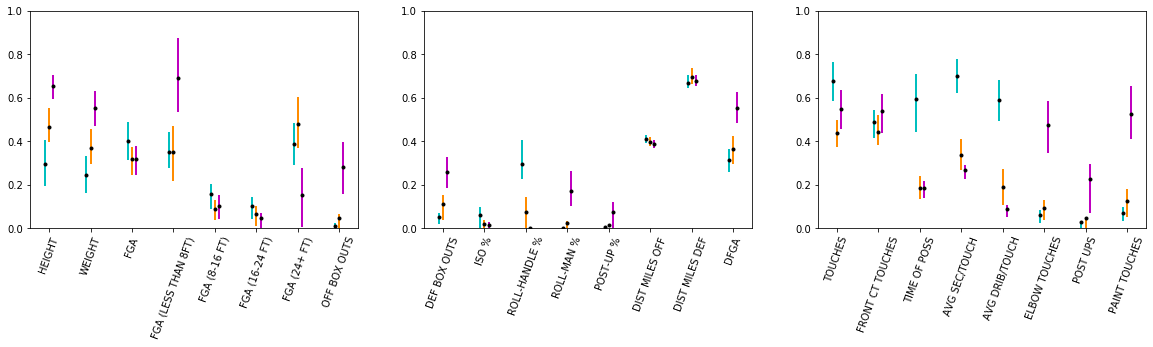

In [99]:
median_k = np.median(list(range(k)))
var_names = list(temp_df.columns[1:9])
line_colors = ['c', 'darkorange', 'm']
fig, axs = plt.subplots(ncols=3, figsize=(20, 4))
for p in range(3):
    var_names = list(temp_df.columns[8*p+1: 8*(p+1)+1])
    for i in range(k):
        temp_df = labeled_X[labeled_X['LABELS'] == i]
        for j in range((8*p+1), 8*(p+1)+1):
            feat_num = j
            col_data = temp_df.iloc[:,feat_num]
            col_stats = col_data.describe()
            x_val = feat_num + 0.1*(i - median_k)
            axs[p].plot([x_val, x_val], [col_stats['25%'], col_stats['75%']], line_colors[i], linewidth=2)
            axs[p].plot(x_val, col_stats['mean'], 'k.')
            axs[p].set_ylim([0,1])
    axs[p].set_xticklabels(['']+var_names)
    plt.setp(axs[p].xaxis.get_majorticklabels(), rotation=70)


There are a number of interesting observations from these plots. 
1. The first is the miles traveled on both offense and defense are similar between the three clusters.
2. Some of the features could be redundant i.e. the POST-UP% and POST UPS.

I will remove some of the features and run it again to see how the results differ.

In [101]:
new_X = df.drop(columns=['MIN', 'POST-UP %', 'DIST MILES OFF', 'DIST MILES DEF'])

In [109]:
k = 3
kmeans = KMeans(n_clusters=k).fit(new_X)
labels = kmeans.labels_
minutes_played = df['MIN']
minutes_played = minutes_played.to_frame()
minutes_played.insert(1, 'LABELS', labels)

In [110]:
top_10_lists = []
for label in range(k):
    top_10_lists.append(get_top_players(minutes_played, label))
pd.DataFrame(top_10_lists).transpose()

,0,1,2
0,Devin Booker,Tobias Harris,Bam Adebayo
1,James Harden,Harrison Barnes,Domantas Sabonis
2,CJ McCollum,P.J. Tucker,Rudy Gobert
3,Shai Gilgeous-Alexander,Bojan Bogdanovic,Nikola Jokic
4,Devonte' Graham,Jayson Tatum,Julius Randle
5,Donovan Mitchell,De'Andre Hunter,Hassan Whiteside
6,Terry Rozier,Miles Bridges,Anthony Davis
7,Collin Sexton,T.J. Warren,Andre Drummond
8,Damian Lillard,Duncan Robinson,Al Horford
9,Trae Young,Joe Harris,Giannis Antetokounmpo


In [121]:
cluster, counts = np.unique(labels, return_counts=True)
[print('Group ' + str(cluster[i]) + ': ' + str(counts[i]) + ' elements') for i in range(len(cluster))]

Group 0: 140 elements
Group 1: 250 elements
Group 2: 124 elements


[None, None, None]

In [111]:
labeled_X = new_X.copy()
labeled_X.insert(0, 'LABELS', labels)

Let's look at the data distribution for each cluster, feature combination. Each feature has three lines, a blue line for cluster 0, gold line for cluster 1, and magenta line for cluster 2. The line begins at the 25th percentile of the cluster's distribution over the feature. The line ends at the 75th percentile. The point on the line is the mean of the data.

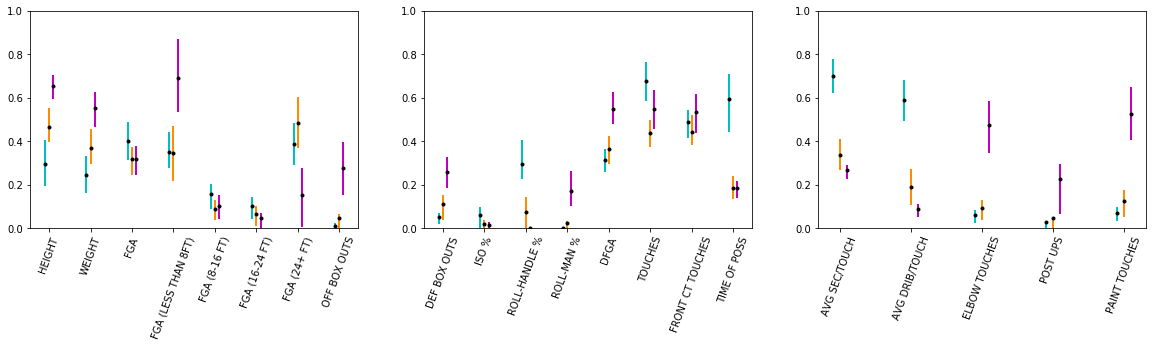

In [112]:
median_k = np.median(list(range(k)))
var_names = list(temp_df.columns[1:9])
line_colors = ['c', 'darkorange', 'm']
fig, axs = plt.subplots(ncols=3, figsize=(20, 4))
for p in range(3):
    var_names = list(temp_df.columns[8*p+1: 8*(p+1)+1])
    for i in range(k):
        temp_df = labeled_X[labeled_X['LABELS'] == i]
        for j in range((8*p+1), 8*(p+1)+1):
            if j >= temp_df.shape[1]:
                break
            feat_num = j
            col_data = temp_df.iloc[:,feat_num]
            col_stats = col_data.describe()
            x_val = feat_num + 0.1*(i - median_k)
            axs[p].plot([x_val, x_val], [col_stats['25%'], col_stats['75%']], line_colors[i], linewidth=2)
            axs[p].plot(x_val, col_stats['mean'], 'k.')
            axs[p].set_ylim([0,1])
    axs[p].set_xticklabels(['']+var_names)
    plt.setp(axs[p].xaxis.get_majorticklabels(), rotation=70)
